导入必要的包并检查版本

In [1]:
# check version

import tensorflow as tf
from tensorflow import keras

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
import numpy as np
import pandas as pd
import os,sys,time

for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

matplotlib 3.1.1
numpy 1.16.0
pandas 0.25.1
sklearn 0.21.3
tensorflow 2.0.0-beta0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


加载下载好的mnist数据集

In [2]:
def load_mnist_func(path):
    f = np.load(path)
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']
    f.close()
    return (x_train, y_train), (x_test, y_test)


(x_train_data,y_train_data),(x_test_data,y_test_data) = load_mnist_func(path='./data/mnist.npz')
print("x_train_shape:",x_train_data.shape)
print("y_train_shape:",y_train_data.shape)
print("x_test_shape:",x_test_data.shape)
print("y_test_shape:",y_test_data.shape)

x_train_shape: (60000, 28, 28)
y_train_shape: (60000,)
x_test_shape: (10000, 28, 28)
y_test_shape: (10000,)


调整数据集格式并归一化，然后onehot编码


In [3]:
#选出10张图片之后做测试
test_imgs = x_test_data[0:10]
print(test_imgs.shape)

(10, 28, 28)


In [4]:
#60000x28x28 ==>60000x784 并且归一化
x_train_data = x_train_data.reshape(-1,28,28,1)/255.0

x_test_data = x_test_data.reshape(-1,28,28,1)/255.0

# ==>onehot
y_train_data = keras.utils.to_categorical(y_train_data,num_classes=10)
y_test_data = keras.utils.to_categorical(y_test_data,num_classes=10)

训练模型

In [5]:
#搭建CNN Model

model = keras.models.Sequential()
model.add(keras.layers.Convolution2D(input_shape = (28,28,1),filters = 32,kernel_size = 3,
    strides = 1,padding = 'same',activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = 2,strides =2,padding = 'same',))

model.add(keras.layers.Convolution2D(64,3,strides=2,padding='same',activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2,2,'same'))

#把第二个池化层的输出扁平化为1维
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024,activation = 'relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(10,activation='softmax'))

sgd = keras.optimizers.SGD(lr=0.1)
model.compile(
    optimizer=sgd,
    loss='categorical_crossentropy',
    metrics=['accuracy'])

#train
model.fit(x_train_data,y_train_data,batch_size=32,epochs=5)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 35s 587us/sample - loss: 0.2496 - accuracy: 0.9188
Epoch 2/5
60000/60000 [==============================] - 35s 581us/sample - loss: 0.0745 - accuracy: 0.9758
Epoch 3/5
60000/60000 [==============================] - 37s 608us/sample - loss: 0.0523 - accuracy: 0.9833
Epoch 4/5
60000/60000 [==============================] - 35s 588us/sample - loss: 0.0396 - accuracy: 0.9877
Epoch 5/5
60000/60000 [==============================] - 35s 582us/sample - loss: 0.0329 - accuracy: 0.9893


In [6]:
#evaluate of test data
loss,accuracy = model.evaluate(x_test_data,y_test_data)
print("test loss: ",loss)
print("test acc: ",accuracy)

10000/10000 [==============================] - 2s 158us/sample - loss: 0.0309 - accuracy: 0.9894
test loss:  0.030856357899319845
test acc:  0.9894


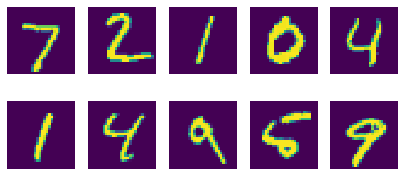

In [7]:
# show images
plt.figure(figsize=(5*1.4,2*1.6))

index = 0
for row in range(2):
    for col in range(5):
        plt.subplot(2,5,index+1)
        plt.imshow(test_imgs[index],interpolation='nearest')
        index+=1
        plt.axis('off')
plt.show()

In [8]:
for i in range(10):
    print(np.argmax(model.predict(test_imgs[i].reshape(-1,28,28,1)/255.0),axis=1))

[7]
[2]
[1]
[0]
[4]
[1]
[4]
[9]
[5]
[9]
